# Tutorial 0: Basic examples

Synthetic tabular data is a type of data that is artificially generated, rather than collected from real-world sources. It is designed to mimic the structure and characteristics of real-world data, and is often used in a variety of applications, including machine learning, data analysis, and testing.

Synthetic tabular data is usually created by combining different elements from real-world data sets, and then applying various transformations and randomization techniques to create new, artificial data. This allows researchers to study and test algorithms and models on data that is similar to what they would encounter in the real world, but without the need to collect and use sensitive or confidential real-world data.

`synthcity` supports generating tabular data for various modalities. In this tutorial we will cover the general-purpose models.

In [2]:
!pip install synthcity
!pip uninstall -y torchaudio torchdata

  Using cached torchdata-0.7.1-cp39-cp39-win_amd64.whl.metadata (13 kB)
Using cached torchdata-0.7.1-cp39-cp39-win_amd64.whl (1.3 MB)
Found existing installation: torchdata 0.7.1
Uninstalling torchdata-0.7.1:
  Successfully uninstalled torchdata-0.7.1


In [1]:
# stdlib
import sys
import warnings

warnings.filterwarnings("ignore")

# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [2]:
# Preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
loader = GenericDataLoader(
    X,
    target_column="target",
    sensitive_columns=["sex"],
)

## List the available generative models

In [3]:
# synthcity absolute
from synthcity.plugins import Plugins

Plugins().list()

[2024-11-24T19:43:13.854994+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-11-24T19:43:13.854994+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['dummy_sampler',
 'uniform_sampler',
 'marginal_distributions',
 'survival_ctgan',
 'radialgan',
 'privbayes',
 'decaf',
 'survival_gan',
 'dpgan',
 'nflow',
 'fflows',
 'survae',
 'tvae',
 'rtvae',
 'great',
 'aim',
 'adsgan',
 'pategan',
 'ddpm',
 'bayesian_network',
 'ctgan',
 'arf',
 'timegan',
 'timevae',
 'image_adsgan',
 'survival_nflow',
 'image_cgan']

## Load and train a generative model

In [4]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("marginal_distributions")

syn_model.fit(loader)

[2024-11-24T19:44:36.834771+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


## Generate new data using the model

In [5]:
syn_model.generate(count=10).dataframe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.012390,-0.044642,0.052872,0.021754,0.027268,0.056934,0.053274,0.067191,0.016427,0.012267,201.169135
1,0.048652,0.050680,0.096268,0.062424,0.073969,0.109243,0.100439,0.110720,0.059634,0.057751,254.575787
2,0.024148,0.050680,0.066944,0.034942,0.042412,0.073896,0.068568,0.081306,0.030437,0.027016,218.487044
3,0.011533,-0.044642,0.051847,0.020794,0.026165,0.055699,0.052160,0.066163,0.015406,0.011192,199.907502
4,-0.014889,0.050680,0.020227,-0.008840,-0.007863,0.017584,0.017793,0.034446,-0.016076,-0.021949,160.993191
5,0.033548,0.050680,0.078194,0.045485,0.054518,0.087457,0.080795,0.092590,0.041638,0.038807,232.332010
6,-0.011852,0.050680,0.023861,-0.005434,-0.003952,0.021965,0.021743,0.038091,-0.012458,-0.018140,165.465495
7,0.087138,0.050680,0.142326,0.105588,0.123535,0.164761,0.150498,0.156919,0.105491,0.106025,311.259133
8,0.102807,0.050680,0.161077,0.123161,0.143714,0.187364,0.170878,0.175728,0.124161,0.125678,334.335746
9,-0.023654,0.050680,0.009738,-0.018669,-0.019151,0.004941,0.006393,0.023925,-0.026520,-0.032942,148.084728


## Generate new data using conditionals

We will condition the generated data using the target data(y).

In [6]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("adsgan")

syn_model.fit(loader, cond=y.to_frame())

[2024-11-24T19:45:34.464600+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 849/10000 [01:59<21:27,  7.11it/s]  


In [7]:
import numpy as np

count = 10
syn_model.generate(
    count=count, cond=np.ones(count)
).dataframe()  # generate only patients with the outcome = 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.027687,-0.044642,0.026062,-0.027359,-0.011260,-0.002326,0.067763,-0.001991,-0.025020,-0.029927,160.054457
1,-0.061410,-0.044642,0.023202,-0.066684,-0.061295,-0.043436,-0.038444,0.028376,-0.024096,0.013694,89.166580
2,0.021851,0.050680,-0.003764,0.010140,0.013428,-0.034781,-0.029362,0.028537,0.074161,0.019740,261.063666
3,-0.093216,-0.044642,-0.034537,-0.062475,-0.004471,-0.014155,0.079690,0.000051,-0.031497,-0.029553,93.006369
4,-0.046209,0.050680,0.082496,0.000707,0.043136,0.062323,0.043120,-0.000953,-0.026081,0.012682,246.327561
5,-0.086643,0.050680,0.099709,-0.041935,0.064530,0.088090,-0.042836,0.072641,0.059012,0.015425,183.332735
6,-0.002016,0.050680,0.112869,-0.033418,0.035700,0.050077,-0.056295,0.082996,-0.010578,-0.015162,252.669162
7,0.017230,0.050680,-0.018333,0.056748,-0.007430,0.009303,-0.005674,-0.005407,-0.023408,0.014049,81.389352
8,0.020569,-0.044642,0.036131,-0.039300,-0.015820,-0.014876,0.037320,-0.039848,-0.040175,-0.034299,85.572840
9,0.025703,0.050680,-0.025358,-0.048500,-0.048722,-0.046166,-0.032153,-0.041581,-0.037248,-0.046818,150.959304


## Serialization

In [8]:
# synthcity absolute
from synthcity.utils.serialization import load, load_from_file, save, save_to_file

buff = save(syn_model)

type(buff)

bytes

In [9]:
reloaded = load(buff)

reloaded.name()

'adsgan'

## Plot real-synthetic distributions

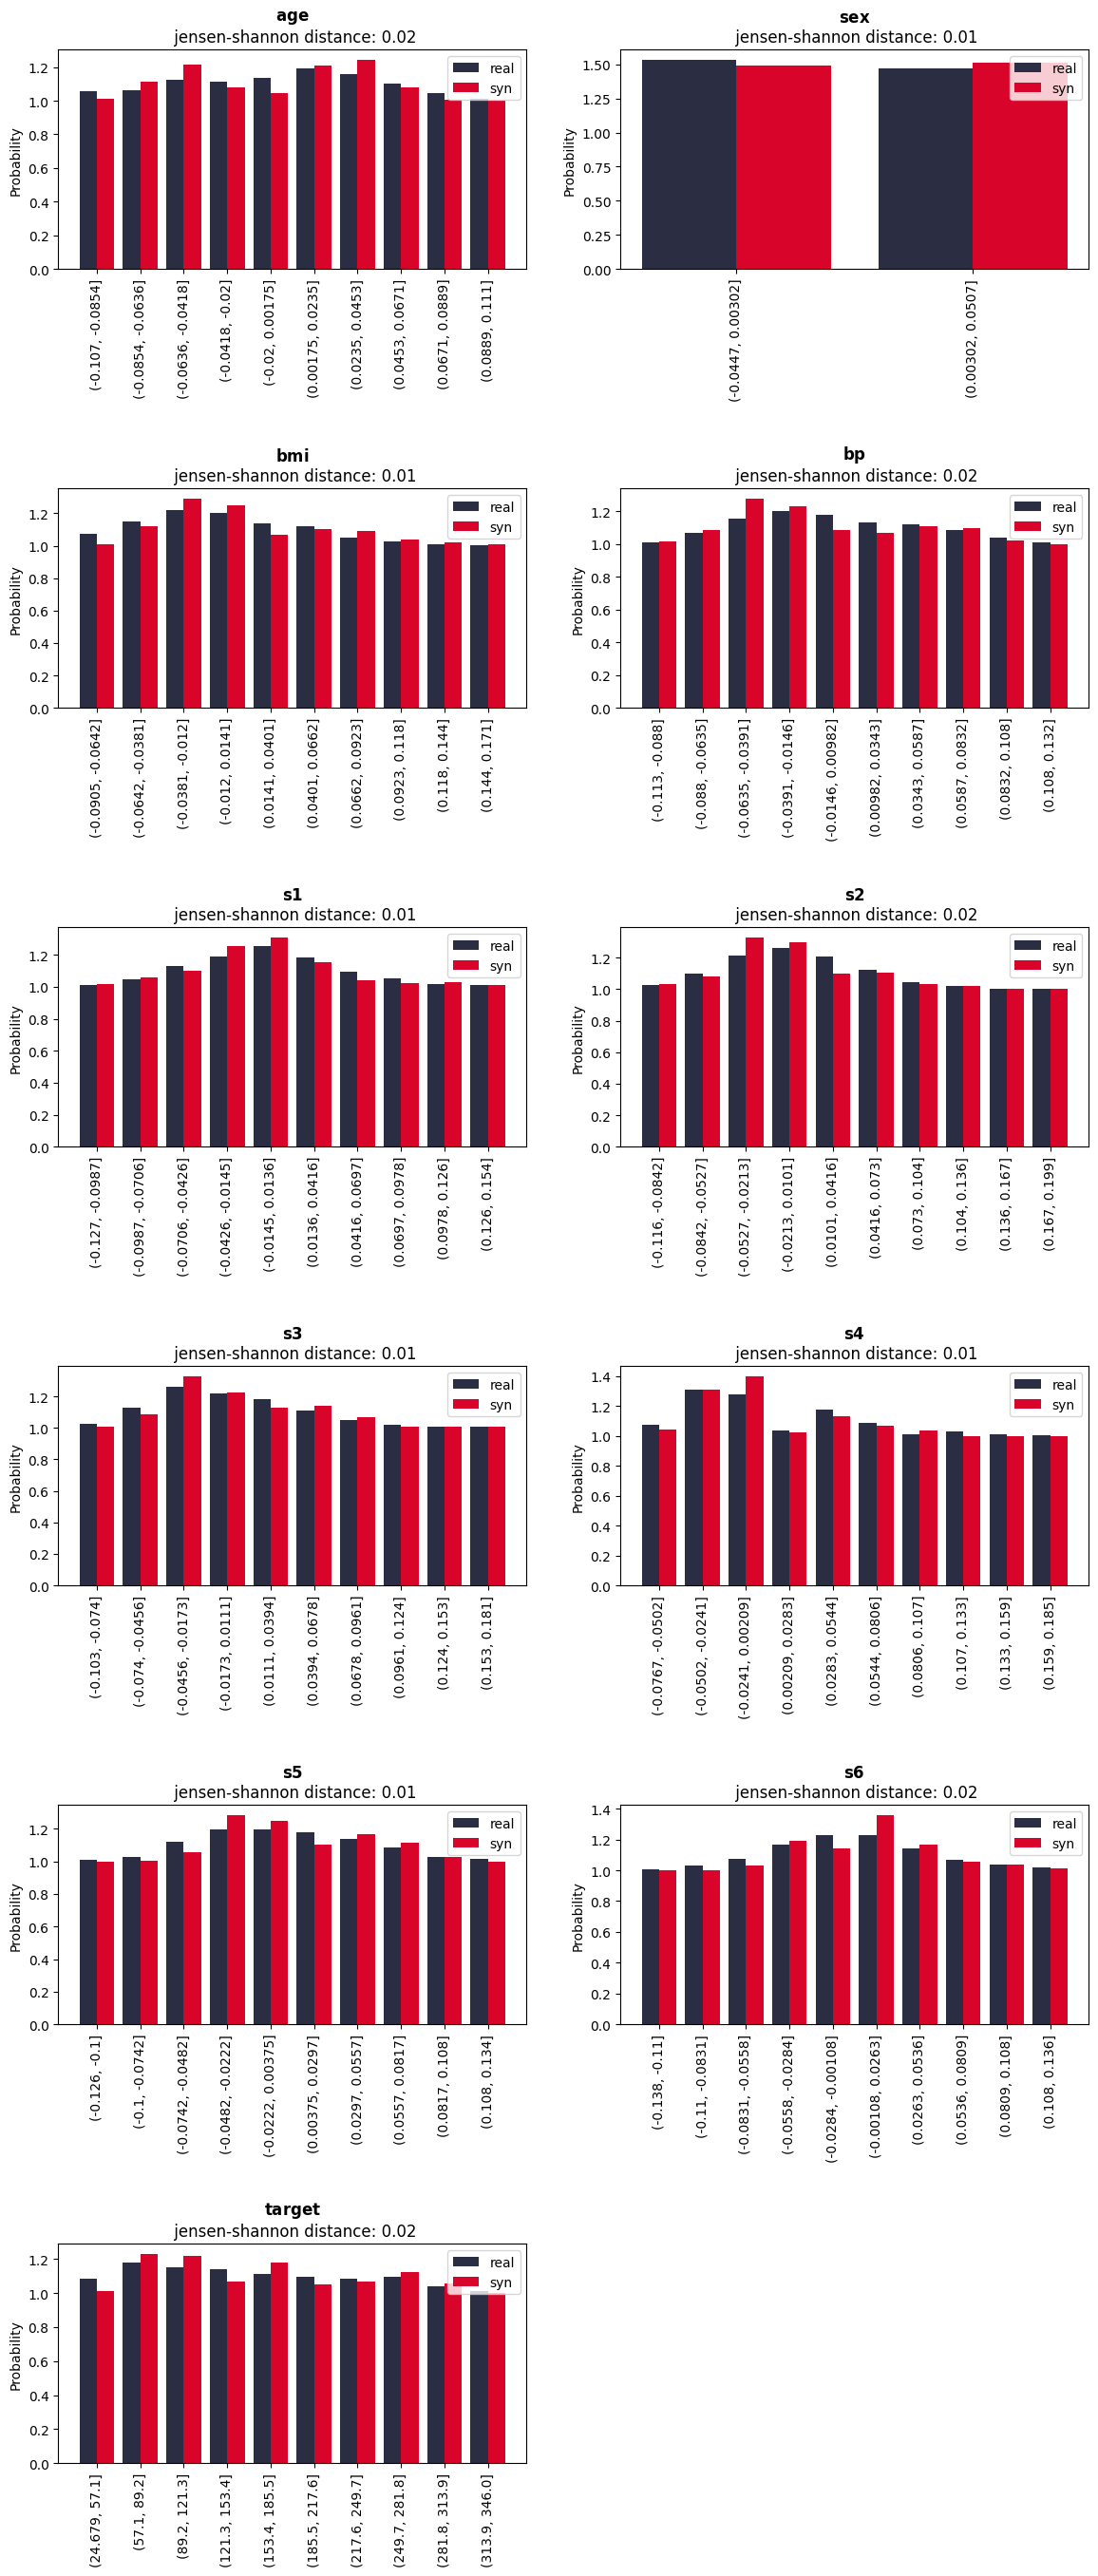

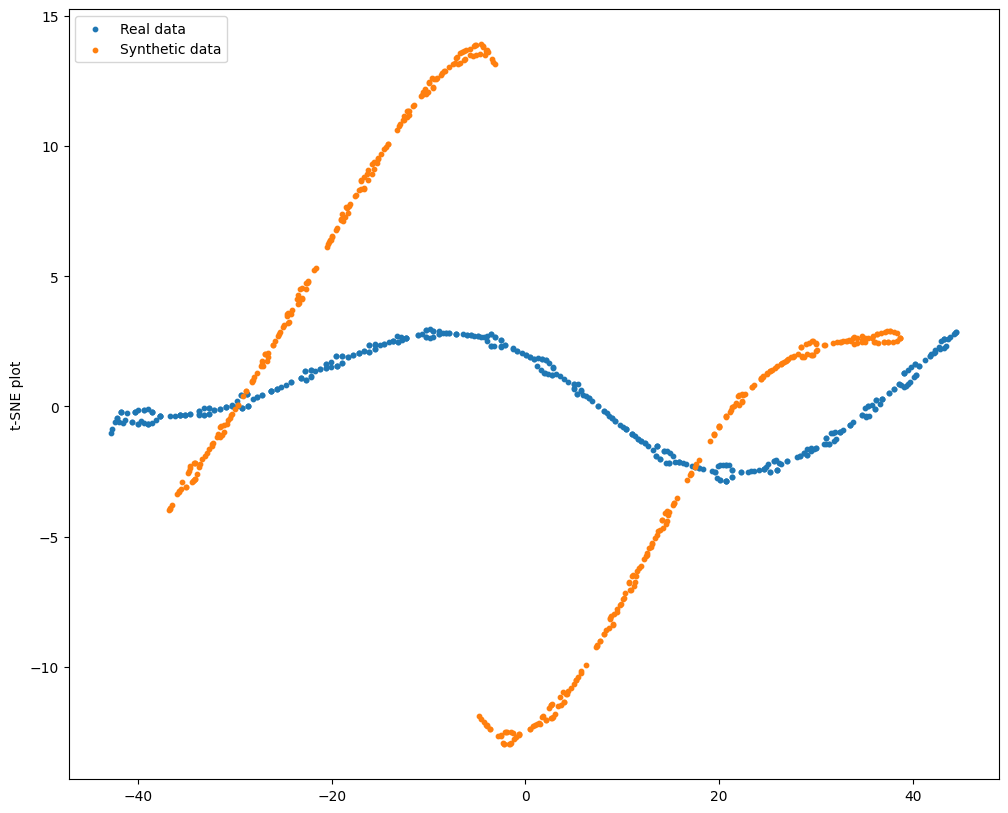

In [10]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

## Benchmarking metrics

| **Metric**                                         | **Description**                                                                                                            |
|----------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| sanity.data\_mismatch.score                        | Data types mismatch between the real//synthetic features                                                                   |
| sanity.common\_rows\_proportion.score              | Real data copy-paste in the synthetic data                                                                                 |
| sanity.nearest\_syn\_neighbor\_distance.mean       | Computes the \textless{}reduction\textgreater{}(distance) from the real data to the closest neighbor in the synthetic data |
| sanity.close\_values\_probability.score            | the probability of close values between the real and synthetic data.                                                       |
| sanity.distant\_values\_probability.score          | the probability of distant values between the real and synthetic data.                                                     |
| stats.jensenshannon\_dist.marginal                 | the average Jensen-Shannon distance                                                                                        |
| stats.chi\_squared\_test.marginal                  | the one-way chi-square test.                                                                                               |
| stats.feature\_corr.joint                          | the correlation/strength-of-association of features in data-set with both categorical and continuous features              |
| stats.inv\_kl\_divergence.marginal                 | the average inverse of the Kullback–Leibler Divergence metric.                                                             |
| stats.ks\_test.marginal                            | the Kolmogorov-Smirnov test for goodness of fit.                                                                           |
| stats.max\_mean\_discrepancy.joint                 | Empirical maximum mean discrepancy. The lower the result the more evidence that distributions are the same.                |
| stats.prdc.precision                               | precision between the two manifolds                                                                                        |
| stats.prdc.recall                                  | recall between the two manifolds                                                                                           |
| stats.prdc.density                                 | density between the two manifolds                                                                                          |
| stats.prdc.coverage                                | coverage between the two manifolds                                                                                         |
| stats.alpha\_precision.delta\_precision\_alpha\_OC | Delta precision                                                                                                            |
| stats.alpha\_precision.delta\_coverage\_beta\_OC   | Delta coverage                                                                                                             |
| stats.alpha\_precision.authenticity\_OC            | Authetnticity                                                                                                              |
| performance.linear\_model.gt.aucroc              | Train on real, test on the test real data using LogisticRegression: AUCROC                                                             |
| performance.linear\_model.syn\_id.aucroc         | Train on synthetic, test on the train real data using LogisticRegression: AUCROC                                                       |
| performance.linear\_model.syn\_ood.aucroc        | Train on synthetic, test on the test real data using LogisticRegression: AUCROC                                                        |
| performance.mlp.gt.aucroc                        | Train on real, test on the test real data using NN: AUCROC                                                                |
| performance.mlp.syn\_id.aucroc                    | Train on synthetic, test on the train real data using NN: AUCROC                                                          |
| performance.mlp.syn\_ood.aucroc                   | Train on synthetic, test on the test real data using NN: AUCROC                                                           |
| performance.xgb.gt.aucroc                         | Train on real, test on the test real data using XGB: AUCROC                                                               |
| performance.xgb.syn\_id.aucroc                    | Train on synthetic, test on the train real data using XGB: AUCROC                                                         |
| performance.xgb.syn\_ood.aucroc                   | Train on synthetic, test on the test real data using XGB: AUCROC                                                          |
| performance.feat\_rank\_distance.corr              | Correlation for the rank distances between the feature importance on real and synthetic data                               |
| performance.feat\_rank\_distance.pvalue            | p-vale for the rank distances between the feature importance on real and synthetic data                                    |
| detection.detection\_xgb.mean                      | The average AUCROC score for detecting synthetic data using an XGBoost.                                                    |
| detection.detection\_mlp.mean                      | The average AUCROC score for detecting synthetic data using a NN.                                                          |
| detection.detection\_gmm.mean                      | The average AUCROC score for detecting synthetic data using a GMM.                                                         |
| privacy.delta-presence.score                       | the maximum re-identification probability on the real dataset from the synthetic dataset.                                  |
| privacy.k-anonymization.gt                         | the k-anon for the real data                                                                                               |
| privacy.k-anonymization.syn                        | the k-anon for the synthetic data                                                                                          |
| privacy.k-map.score                                | the minimum value k that satisfies the k-map rule.                                                                         |
| privacy.distinct l-diversity.gt                    | the l-diversity for the real data                                                                                          |
| privacy.distinct l-diversity.syn                   | the l-diversity for the synthetic data                                                                                     |
| privacy.identifiability\_score.score               | the re-identification score on the real dataset from the synthetic dataset.                                                |

## Benchmark the quality of plugins

In [11]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        ("marginal_distributions", "marginal_distributions", {}),
        ("dummy_sampler", "dummy_sampler", {}),
    ],
    loader,
    synthetic_size=1000,
    repeats=2,
)

[2024-11-24T19:54:45.668595+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-11-24T19:56:26.089443+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-11-24T19:56:26.408277+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-11-24T19:58:04.937985+0800][6360][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


In [12]:
Benchmarks.print(score)


Comparatives


,marginal_distributions,dummy_sampler
sanity.data_mismatch.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.common_rows_proportion.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.nearest_syn_neighbor_distance.mean,0.235 +/- 0.0,0.159 +/- 0.004
sanity.close_values_probability.score,0.596 +/- 0.0,0.848 +/- 0.006
sanity.distant_values_probability.score,0.011 +/- 0.0,0.017 +/- 0.006
stats.jensenshannon_dist.marginal,0.027 +/- 0.0,0.015 +/- 0.001
stats.chi_squared_test.marginal,0.99 +/- 0.0,0.625 +/- 0.003
stats.inv_kl_divergence.marginal,0.819 +/- 0.0,0.808 +/- 0.008
stats.ks_test.marginal,0.764 +/- 0.0,0.882 +/- 0.001
stats.max_mean_discrepancy.joint,0.024 +/- 0.0,0.023 +/- 0.002


## Congratulations!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement towards Machine learning and AI for medicine, you can do so in the following ways!

### Star [Synthcity](https://github.com/vanderschaarlab/synthcity) on GitHub

- The easiest way to help our community is just by starring the Repos! This helps raise awareness of the tools we're building.


### Checkout other projects from vanderschaarlab
- [HyperImpute](https://github.com/vanderschaarlab/hyperimpute)
- [AutoPrognosis](https://github.com/vanderschaarlab/autoprognosis)
